# Clase 18 de mayo de 2023 #
## Fundamentos de Probabilidad ##
### Probabilidad ###
La probabilidad es el marco que nos permite cuantificar la incertidumbre.  

**Espacio muestral:** Es el conjunto de todos los posibles resultados de un experimento y se le denota por $\Omega$.

**Evento:** Subconjunto del espacio muestral.

**Axiomas** de la probabilidad:
1. $0 \leq P(A) \leq 1$
2. $P(\Omega)=1$
3. $P(A_1\cup A_2\cup ... \cup A_n)=\sum_{i=1}^n P(A_i)$ si los eventos $A_n$ son mutuamente excluyentes

$ P(A^c) = 1 - P(A) $

Por ejemplo si nuestro experimento es lanzar un dado de 6 caras entonces, $\Omega=[1,2,3,4,5,6]$ y $A$ sea el evento  

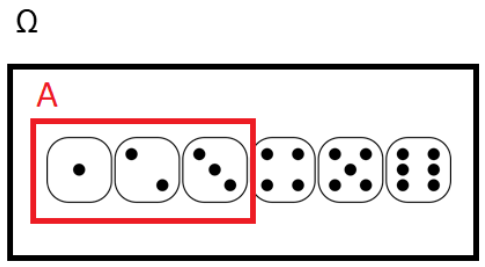

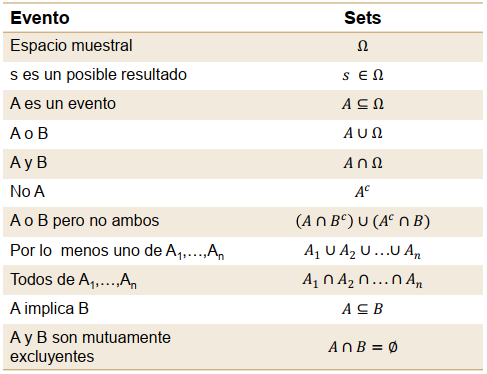


In [1]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Operaciones con sets
A = set([1,2,2,2,2])
B = set([3,4])

print('A:', A)
print('B:', B)

# Añadir elementos a un set
A.update([3,4,5,6])
print(A)

A: {1, 2}
B: {3, 4}
{1, 2, 3, 4, 5, 6}


In [3]:
# Quitar elementos de un set
A.remove(6)
print('A:',A)

A: {1, 2, 3, 4, 5}


In [4]:
# Verificar si un elemento est dentro de un set
print(10 in A)

# Subset
print('B es un subset de A:', B.issubset(A))
print('A es un subset de B:',A.issubset(B))

# Union
C = set([5,6,7,8,9,10])
print('A:', A)
print('C:', C)
print('Union:',A.union(C))
print('Union:',(C|A))

# Interseccion
print(A.intersection(C))
print(A&C)

# Diferencia contiene todos los elementos en A pero no en C
print(A.difference(C))

# Diferencia simetrica nos va a dar el conjunto de todos los elementos que estan en uno de los conjuntos pero no en ambos
print(A.symmetric_difference(C))

False
B es un subset de A: True
A es un subset de B: False
A: {1, 2, 3, 4, 5}
C: {5, 6, 7, 8, 9, 10}
Union: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Union: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
{5}
{5}
{1, 2, 3, 4}
{1, 2, 3, 4, 6, 7, 8, 9, 10}


Algunos espacios muestrales, como en el caso del dado, tienen resultados igualmente probables. En esos casos el cálculo de la probabilidad se vuelve un problema de conteo:  
$ P(A) = \frac{\#\;resultados\;favorables\;A}{\#\;resultados\;totales\;\Omega} $

$ P(E) = lim_{n->\infty} \frac{n(E)}{n} $

In [6]:
!pip install ipywidgets

In [12]:
@widgets.interact(n_tiros=(10,100_000,1000), continuous_update=False)
def simular_dado(n_tiros=10):
    resultados = [1,2,3,4,5,6]
    tiros = np.random.choice(resultados, p=[1/6.]*6, size=n_tiros)
    
    # Contar cuantos resultados tenemos de cada numero
    count = []
    for i in range(len(resultados)):
        count.append(sum(tiros==i+1)/n_tiros)
    
    plt.bar(np.arange(1,7),count)
    plt.ylim(0,0.5)
    plt.axhline(y=1/6.0, color='r')
    plt.show()

interactive(children=(IntSlider(value=10, description='n_tiros', max=100000, min=10, step=1000), Output()), _d…

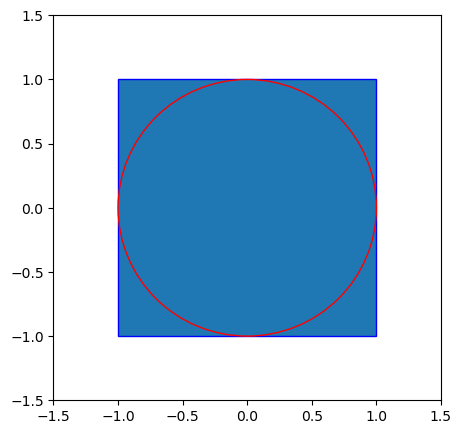

In [21]:
# Probabilidad de lanzar un dardo
plt.figure(figsize=(5,5))
plt.axes()
rectangle = plt.Rectangle((-1, -1), 2, 2, ec='blue')
circle = plt.Circle((0,0),1,ec='red')
plt.gca().add_patch(rectangle)
plt.gca().add_patch(circle)
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)

plt.show()

La probabilidad de que un punto aleatorio $(x,y)$ se encuentre dentro del círculo es la razón del área del círculo dividido entre el área del cuadrado. Es decir:  

$ P(punto\;dentro\;de\;circulo) = \frac{\pi *r^2}{r^2}*\frac{1}{4} = \frac{\pi}{4} $

In [66]:
n_tiros = 100000
#np.random.random((n_tiros, 2))
x, y = np.random.uniform(low=-1.0, high=1.0, size=(2,n_tiros))
inside = (x**2 + y**2) <= 1.0
approx_pi = float(4*np.sum(inside))/float(n_tiros)
print(f'Pi:\t{np.pi}')
print(f'Pi approx.:\t{approx_pi}')

Pi:	3.141592653589793
Pi approx.:	3.14948


In [14]:
error = []
for n_tiros in range(1000,10_000_000,10_000):
    x, y = np.random.uniform(low=-1.0, high=1.0, size=(2,n_tiros))
    inside = (x**2 + y**2) <= 1.0
    approx_pi = float(4*np.sum(inside))/float(n_tiros)
    #print(f'Pi:\t{np.pi}')
    #print(f'Pi approx.:\t{approx_pi}')
    error.append(np.abs(approx_pi - np.pi))

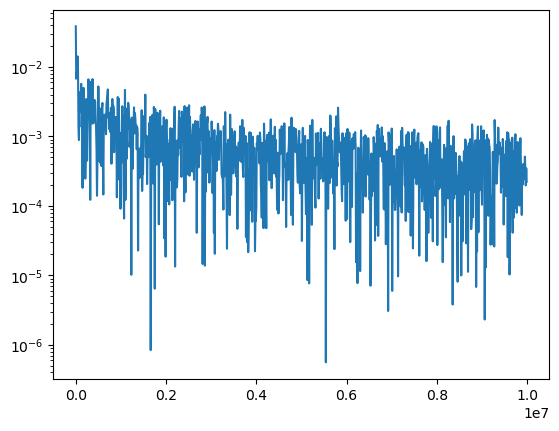

In [12]:
plt.plot(np.arange(1000,10_000_000, 10_000), error)
plt.yscale('log',base=10) 
plt.show()

Con esto podemos estimar el valor de pi, a este método se le conoce como "Integración Monte Carlo"

### Probabilidad condicional ###
La probabilidad condicional generalmente se utiliza para examinar eventos en subconjuntos del espacio muestral. Específicamente, estamos interesados en la probabilidad de que un evento ocurra solo si otro evento ha ocurrido primero. Por ejemplo: la probabilidad de que una institución financiera quiebre dado que otra institución financiera ha quebrado.  
$ P(A|B)=\frac{P(A\cap B)}{P(B)} $  

*Ejemplo:* Fallos de SIFIs (Systemically Important Financial Institutions)  
Supongamos que la probabilidad de que falle por lo menos una institución financiera en un año cualquiera es del 1%.  
Supongamos que si quiebra una institución financiera entonces hay un 20% de probabilidad de que el numero de instituciones que fallen sea exactamente 1, 2, 3, 4 o 5.  

Para un año cualquiera ¿cuál es la probabilidad de que falle (exactamente) una institución?  


¿Cuál sería la probabilidad de que fallen por lo menos dos instituciones financieras dado que falló por lo menos una?  

### Independencia ###
Se dice que dos eventos son independientes si el resultado de un evento no altera tu expectativa sobre si el otro evento ocurrirá o no.  
$P(A|B)=P(A)$  
$ P(A\cap B) = P(A)P(B) $ 

**Ejercicio:**
![Diagrama](img/probabilidad_diagrama.png)


Dada la imagen anterior, calcula:  
1. $ P(A) = ? $
1. $ P(A|B) = ? $
1. $ P(B|A) = ? $
1. $ P(A\cap B\cap C) = ? $ 
1. $ P(B|A\cap C) = ? $ 
1. $ P(A\cap B|C) = ? $ 
1. $ P(A\cup B|C) = ? $ 
1. ¿Alguno de estos pares de eventos es independiente?

**Ejercicio**  
Si es un volado que un administrador de un portafolio tenga mejores rendimientos anuales que su benchmark, y los rendimientos anuales son independientes, ¿cuál es la probabilidad de que un administrador de un portafolio obtenga mejores rendimientos que el benchmark 10 años seguidos?

In [4]:
print(f"{(0.5**10)*100:.4f}%")

0.0977%


### Variables Aleatorias ###  
Es una función que asigna un número a los eventos de un espacio muestral.  
*Discretas*: Solo pueden tomar ciertos valores discretos.  
*Continuas*: Pueden tomar cualquier valor, generalmente hablando, dentro de cierto intevalo  

Ejemplos: precio de un asset, retornos, tasas de interés, P&L de un portafolio, etc...


Se utilizan principalmente dos funciones para describir las propiedades de la distribución de una variable aleatoria.  
**Distribuciones de probabilidad**  
$X_k$ discreta (PMF): $\sum_k P(X_k)=1$  
$X$ continua (PDF): $\int_{-\infty}^{\infty}P(X)dX=1$

**Función de distribución acumulada**  
La función de distribución acumulada, o CDF por sus siglas en inglés, nos da la probabilidad de que X es igual o menor que un valor dado.  
$ F(x)=P(X<x)=\int_{-\infty}^x P(x)dx $  

$ p(x) = \frac{dF(x)}{dx} $  

$ P(a < X < b) = F(b) - F(a) $  

<BarContainer object of 6 artists>

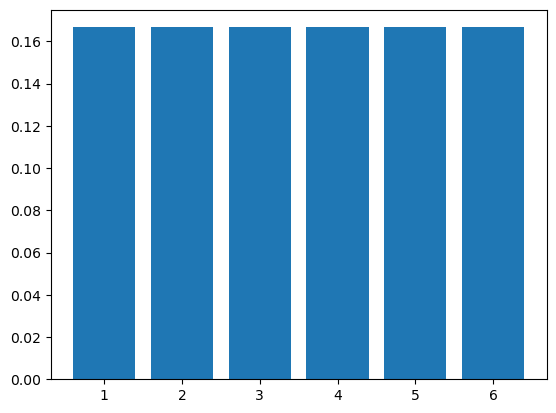

In [5]:
x = [1,2,3,4,5,6]
p_x =[1/6.0] * 6

plt.bar(x, p_x)

<BarContainer object of 6 artists>

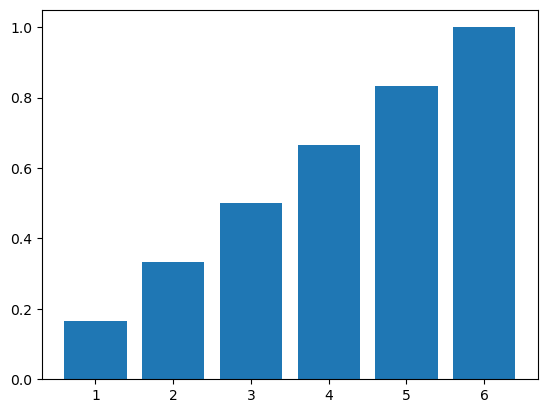

In [6]:
fpa = np.cumsum(p_x)
plt.bar(x, fpa)

### Momentos ###  
**Valor esperado**: Promedio ponderado por probabilidad.  
$E[X]=\sum xP(X=x)$  

Las funciones de variables aleatorias también son variables aleatorias.  
$E[f(X)]=\sum f(x)P(X=x)$


### Opciones ###
Son contratos en los que el comprador adquiere el derecho, más no la obligación, de comprar o vender un subyacente a un precio previamente pactado. El vendedor SÍ tiene la obligación de comprarle o venderle el subyacente al comprador de la opción.  

Por tipo de opción:
- Puts: Opción de vender
- Calls: Opción de compra  

Por fecha de ejercicio:
- Americanas: Se puede ejercer la opción en cualquier fecha antes del vencimiento.
- Europeas: Se puede ejercer la opción solo en el vencimiento.
- Mixtas: Durante cierto plazo son europeas y durante otro plazo son americanas.

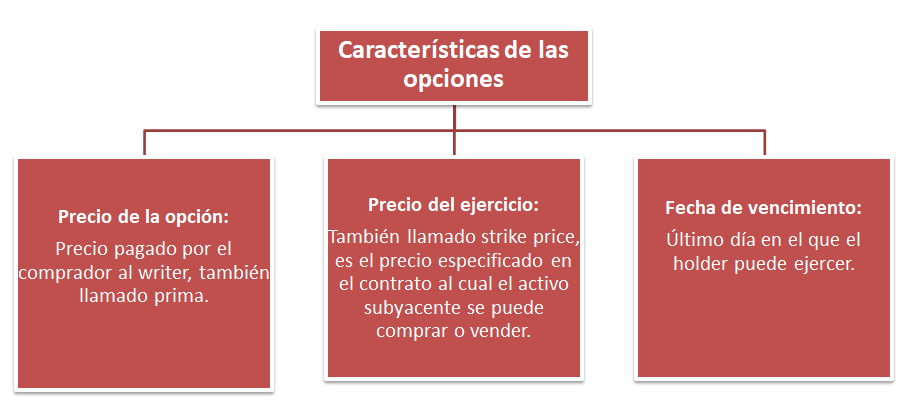

**Payoff de una opción**  
$ S $: precio subyacente  
$ K $: precio pactado o strike  
Call: $ Payoff = max(0, S-K) $  
Put: $ Payoff = max(0, K-S) $

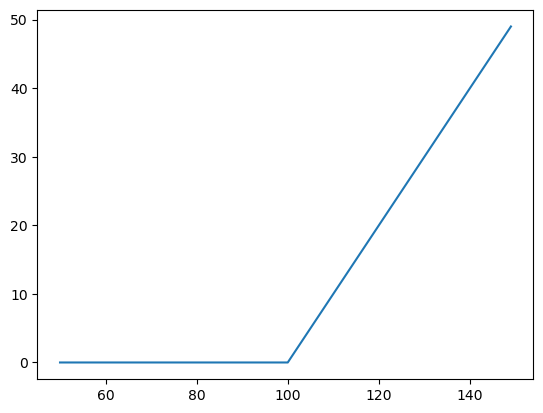

In [9]:
K = 100 # strike
S = np.arange(50,150) # precio del subyacente

payoff = S-K
payoff[payoff < 0] = 0
plt.plot(S,payoff)

**Ejemplo**  
Para valuar un call necesitamos el valor esperado de una función del precio.  
Supongamos que el valor de un asset $S$ tomará uno de tres valores $(20, 50, 100)$ dentro de un año con probabilidades de $0.2, 0.5\;y\;0.3$ respectivamente. Si el strike de la opción es $40$. ¿Cuál es el valor esperado del payoff?

In [17]:
S = np.array([20, 50, 100])
p_S = np.array([0.2, 0.5, 0.3])
K = 40

payoff = S-K
payoff[payoff<0] = 0
prima = payoff @ p_S
print(prima)

23.0


### Distribuciones de variables aleatorias discretas ###
**Bernoulli**  
- Parámetros: $ p $
- Soporte: $ {0,1} $ 
- PMF: $ P(X=x)=
\begin{cases}
p & si\;x=1\\
1-p & si\;x=0
\end{cases} $

In [5]:
p = 0.5
mean, var, skew, kurt = stats.bernoulli.stats(p, moments='mvsk')
print(mean)
print(var)
print(skew)
print(kurt)

0.5
0.25
0.0
-2.0


[0.5 0.5]


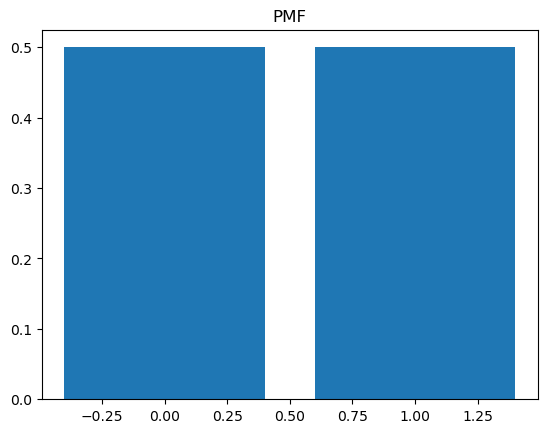

In [6]:
x = np.array([0,1])
pmf = [0.5, 1-0.5]
dist_bern = stats.bernoulli(0.5)
print(dist_bern.pmf(x))

plt.title('PMF')
plt.bar(x, pmf)
plt.show()

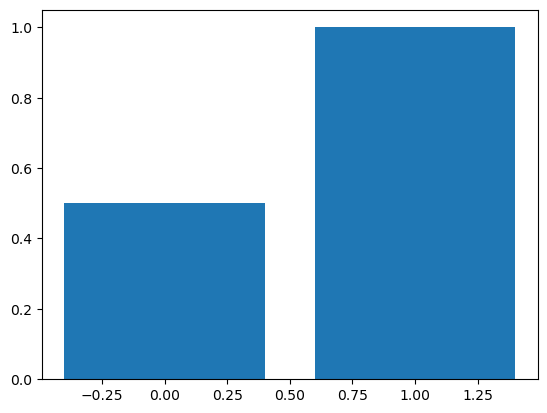

In [7]:
cdf = np.cumsum(pmf)
plt.bar(x, cdf)
plt.show()

**Binomial**  
- Parámetros: $ n, p $
- Soporte: $ {0,1,...,n} $ 
- PMF: $ P(X=x)={n\choose x}p^x (1-p)^{n-x} $  
$ {n\choose x} = \frac{n!}{x!(n-x)!} $

In [8]:
n, p = 252, 0.95

mean, var, skew, kurt = stats.binom.stats(n, p, moments='mvsk')
print(mean)
print(var)
print(skew)
print(kurt)

239.39999999999998
11.97000000000001
-0.26013299085723585
0.05973266499582283


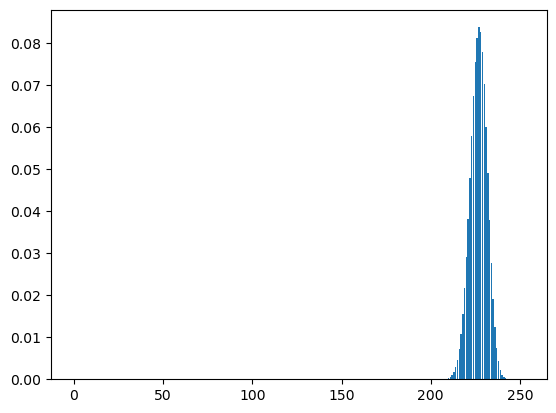

In [15]:
dist_binom = stats.binom(252, 0.9)
type(dist_binom)

x = np.arange(253)
p = dist_binom.pmf(x)

plt.bar(x, p)
plt.show()

**Poisson**  
- Parámetros: $ \lambda$ (es el numero promedio de eventos por intervalo)  
- Soporte: $ {0,1,...,n} $ 
- PMF: $ P(X=x)=\Large{\frac{\lambda^x e^{-\lambda}}{x!}} $

In [16]:
lambd = 5

mean, var, skew, kurt = stats.poisson.stats(lambd, moments='mvsk')
print(mean)
print(var)
print(skew)
print(kurt)

5.0
5.0
0.4472135954999579
0.2


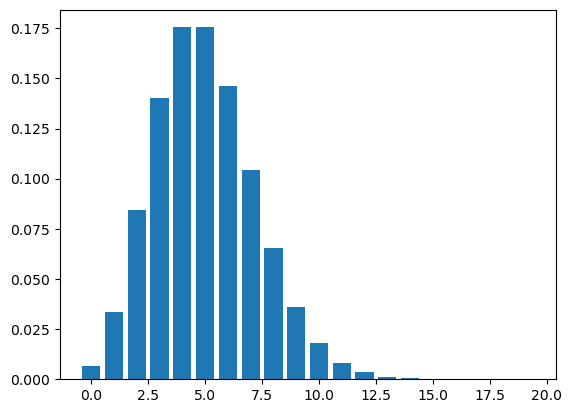

In [17]:
dist_poisson = stats.poisson(lambd)

x = np.arange(20)
p = dist_poisson.pmf(x)

plt.bar(x, p)
plt.show()

In [18]:
dist_poisson.stats(moments="mvsk")

(5.0, 5.0, 0.4472135954999579, 0.2)

**Ejercicio**  
En análisis de supervivencia, el parámetro $ \lambda $ se puede considerar como una tasa de fallo o en inglés hazard rate, y significa el número promedio de eventos por intervalo.  

Supongamos que tenemos un portafolio de un gran número de bonos. En promedio, cada mes 5 bonos hace default. Si asumimos que la probabilidad de que cualquier bono haga default es independiente de los otros bonos, ¿cuál es la probabilidad de que exactamente dos bonos hagan default en un mes?

In [19]:
dist_poisson = stats.poisson(5)
p = dist_poisson.pmf(2)*100
print(f"{p:.2f}%")

8.42%


### Distribuciones de variables aleatorias continuas ###
**Uniforme**  
- Parámetros: $ a,b $
- Soporte: $ x \in [a,b] $ 
- PDF: $ f(x)=
\begin{cases}
\Large\frac{1}{b-a} & x \in [a,b] \\
0 & cualquier\;otro\;caso
\end{cases} $

In [20]:
mean, var, skew, kurt = stats.uniform.stats(moments='mvsk')
print(mean)
print(var)
print(skew)
print(kurt)

0.5
0.08333333333333333
0.0
-1.2


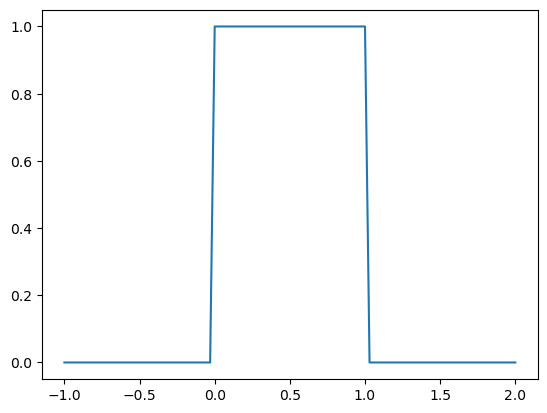

In [21]:
x = np.linspace(-1,2,100)
dist_uniform = stats.uniform()
f_x = dist_uniform.pdf(x)
plt.plot(x, f_x)
plt.show()

**Normal**  
- Parámetros: $ \mu, \sigma^2 $
- Soporte: $ \mathbb{R} $ 
- PDF: $ f(x)=\Large{\frac{1}{\sigma\sqrt{2\pi}}} \large{e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}} $

$ E[X] = \mu $  
$ V[X] = \sigma^2 $  

In [22]:
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')
print(mean)
print(var)
print(skew)
print(kurt)

0.0
1.0
0.0
0.0


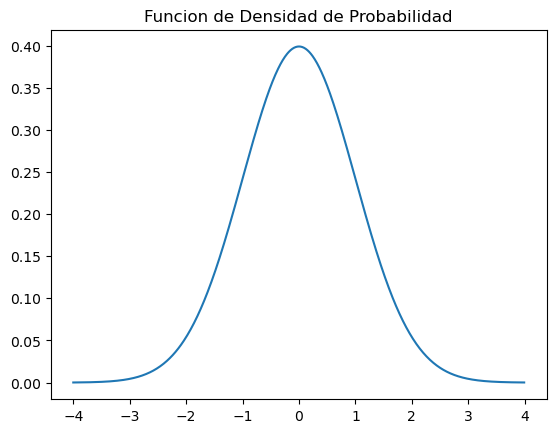

In [23]:
dist_norm = stats.norm()
#x = np.linspace(-4,4,100)
x = np.arange(-4,4,0.01)
f_x = dist_norm.pdf(x)

plt.plot(x, f_x)
plt.title('Funcion de Densidad de Probabilidad')
plt.show()

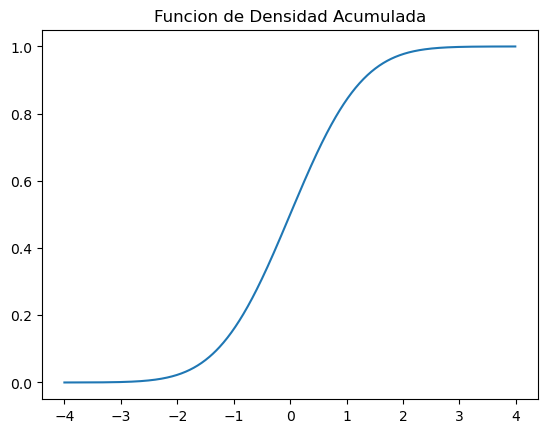

In [24]:
# Funcion de densidad acumulada
cdf = dist_norm.cdf(x)
plt.plot(x, cdf)
plt.title('Funcion de Densidad Acumulada')
plt.show()

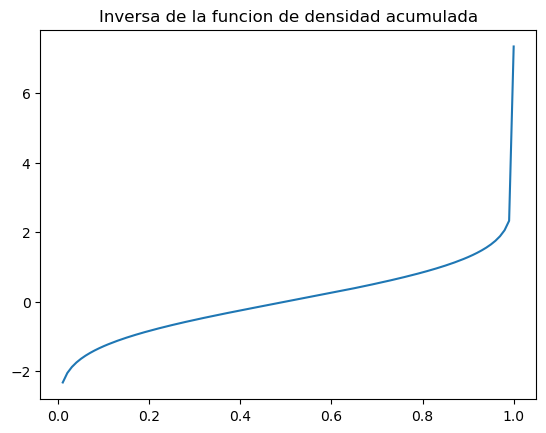

In [25]:
# Inversa de la funcion de densidad acumulada
ppf = dist_norm.ppf(x)
plt.plot(x, ppf)
plt.title('Inversa de la funcion de densidad acumulada')
plt.show()

**Ejercicios**  

$ Z \sim \mathcal N(0,1) $  
$ P(a < X < b) = F(b) - F(a) $  

- $ P(-1.5 < Z < 0)= 43.3\% $ 
- $ P(Z<-1.5)= 6.7\% $ 
- $ P(X>12)\;con\;X \sim \mathcal N(3,9)= 0.1\% $ 


- Si el retorno de una acción $R$ se distribuye normalmente con un promedio diario de $ 8\%/252 $ y una varianza de $ (20\%)^2/252 $, encuentra los valores de $ r $ en los que:
- a. P(R<r) = 0.5%
- b. P(R<r) = 1%
- c. P(R<r) = 10%

In [33]:
# 1
z_dist = stats.norm()
print(z_dist.cdf(0) - z_dist.cdf(-1.5))
print(z_dist.cdf(-1.5))
x_dist = stats.norm(3, np.sqrt(9))
print(1 - x_dist.cdf(12))
print()
r_dist = stats.norm(0.08/252, np.sqrt(0.2**2 / 252))
print(r_dist.ppf(0.005))
print(r_dist.ppf(0.01))
print(r_dist.ppf(0.1))

0.4331927987311419
0.06680720126885807
0.0013498980316301035

-0.032134938525125854
-0.028991767957472436
-0.01582857175271352


In [26]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


**Log Normal**  
Si $X$ es una variable aleatoria con una distribución normal entonces $e^X$ tiene una distribución log normal.
- Parámetros: $ \mu, \sigma^2 $
- Soporte: $ x \in (0,\infty) $ 
- PDF: $ f(x)=\Large{\frac{1}{x\sigma\sqrt{2\pi\sigma^2}}} \large{e^{-\frac{(ln(x)-\mu)^2}{2\sigma^2}}} $

**Ejercicio Value at Risk (VaR)**  
El análisis de riesgo de una cartera de instrumentos tiene dos usos primordiales:
- Cuantificar el impacto que la variabilidad de esos factores de riesgo puede tener en el valor de la cartera.
- Analizar los flujos de la cartera, en el caso en el que ésta tenga como función suministrar flujos en fechas futuras para cubrir pasivos (financieros, actuariales).  


Los factores de riesgo que determinan las variaciones en el valor o en los
flujos de la cartera pueden ser de distintos tipos como:
- equity (precios de acciones, cotizaciones de índices, etc.); 
- tasas (curva cupón cero, factores de descuento, etc.); 
- crédito (ratings, spreads de crédito, etc.). 
- otras variables macroeconómicas que a su vez muevan factores anteriores: los tasas (por ejemplo, por control de inflación), el crédito (ciclo de crédito) o la propia bolsa (ciclo económico).  

A los factores anteriores nos referiremos como de **factores de riesgo**  

Por **riesgo de mercado** se entiende el riesgo de incurrir en pérdidas 
por el mantenimiento de posiciones en los mercados; 
como consecuencia de un movimiento adverso de factores de riesgo

Por otro lado, hablamos de **riesgo de crédito** cuando analizamos riesgos de contrapartida, realizamos análisis de capital económico, etc.  

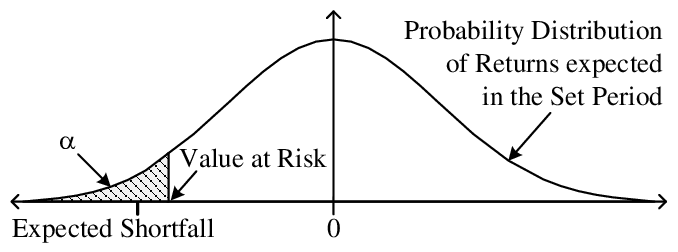

La medida de riesgo más usual es el Valor en Riesgo, **VaR**, iniciales de Value at Risk. El Var viene asociado a un horizonte temporal y un nivel de confianza
El VaRα es simplemente el percentil asociado al nivel de confianza 1 − α:  
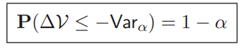
es decir, hay confianza de $ \alpha $ de que la caída de valor no llegue a superar el nivel $ Var_\alpha $

**Ejercicio**  
1. Calcula el VaR (1d) **individual** con alpha=95% suponiendo una distribución normal de los retornos diarios de Microsoft, Cemex, y Bitcoin. 

## Expected shortfall ##
Un problema que tiene el VaR es que no nos da información sobre que tan grandes pueden ser las pérdidas si se excede el nivel de VaR calculado. El “expected shortfall” o VaR condiciona sí toma en cuenta esto, y lo podemos definir como el valor esperado de la pérdida dado que la pérdida es mayor que el VaR.  

$ ES = E[L|L > VaR] $

**Exponencial**  
Se utiliza para modelar el tiempo que transcurre hasta que suceda algun evento en particular.
- Parámetros: $ \lambda $
- Soporte: $ x \in (0,\infty) $ 
- PDF: $ f(x)=\lambda e^{-\lambda x} $

In [ ]:
lambd = 2
mean, var, skew, kurt = stats.expon.stats(loc=0, scale=1/lambd,moments='mvsk')
print(mean)
print(var)
print(skew)
print(kurt)

In [ ]:
dist_exp = stats.expon(loc=0, scale=1/lambd)
x = np.linspace(0,10,100)
f_x = dist_exp.pdf(x)

plt.plot(x, f_x)
plt.show()

**Ejercicio**  

Supongamos que a partir de spreads de crédito sabemos que la hazard rate de una empresa ABC es igual a 0.15. Dado esto:
- Calcula probabilidad de default acumulada $ P(t_d<t) $, la probabilidad de supervivencia $ P(t_d≥t) $, la probabilidad de default de t a t+1 $ P(t<t_d<t+1) $ y la probabilidad condicional de default en t+1 dado que la empresa sobrevivió hasta el tiempo t para 1, 2, 3, 4 y 5 años.
- Haz una gráfica de probabilidad de default acumulada, la probabilidad de supervivencia y la probabilidad condicional respecto al tiempo.


### Variables aleatorias multivariadas ###
En general, todo lo visto hasta el momento para variables aleatorias **univariadas** aplica también para variables aleatorias **multivariadas**, ya que podemos pensar una variable aleatoria multivariada como un **vector** de variables aleatorias. 

Por ejemplo, para una variable aleatoria $X$ bivariada:  
- $X$ será un vector con dos componentes: $[X_1, X_2]$
- Cada uno de los componentes podrá tener dos posibles resultados: $x_1, x_2$  

Para una variable aleatoria multinomial bivariada tendremos que la PMF será:
- $PMF=P(X_1=x_1, X_2=x_2)=\frac{n!}{x_1!x_2!(n-x_1-x_2)!}p_1^{x_1}p_2^{x_2}(1-p_1-p_2)^{n-x_1-x_2}$  

También conocido como **distribución trinomial**.

Un ejemplo podría ser un portafolio con $n$ bonos que se puede clasificar en: grado de inversión, alto rendimiento, sin calificación. Para esto tendremos tres parámetros: $n, p_1, p_2$

In [ ]:
n = 5
p=[0.2, 0.5, 0.3]
dist_mult = stats.multinomial(n, p)

x1_array = np.arange(0, n+1)
X1_mat, X2_mat = np.meshgrid(x1_array, x1_array)
x3_array = n - X1_mat.flatten() - X2_mat.flatten()
X_mat = np.array([X1_mat.flatten(), X2_mat.flatten(), x3_array]).T


x1 = X_mat[:, 0]
x2 = X_mat[:, 1]
z = np.zeros(len(x1))

width = 0.8
dx1 = np.repeat(width, len(x1))
dx2 = np.repeat(width, len(x1))

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.bar3d(x1-width/2, x2-width/2, z, dx1, dx2, dist_mult.pmf(X_mat))
ax1.set_xlabel('$x_1$')
ax1.set_ylabel('$x_2$')

plt.show()

Otra manera de representar una distribución discreta multivariada es utilizando una **matriz de probabilidad**.  
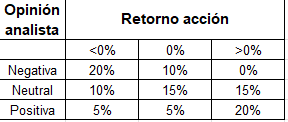

- ¿Cuál sería la probabilidad marginal de $X_1$ y $X_2$?  
- ¿Cuál sería la probabilidad de que tengamos pérdidas dado que un analista dio una opinión positiva?

#### Momentos ####  
- $ E[X]= [E[X_1],E[X_2]] $  
- $ E[g(X_1, X_2)] = \sum_{x_1}\sum_{x_2}g(x_1,x_2)PMF(x_1,x_2) $  

Pero un nuevo término aparece en el segundo momento de $X$ conocido como la **covarianza** de $X$. Sabemos que la varianza es:  
$$
V[X_1]=E[(X_1-E[X_1])^2]
$$

La covarianza entre $X_1$ y $X_2$ se define como:  
$$
Cov[X_1,X_2]=E[(X_1-E[X_1])\cdot(X_2-E[X_2])]
$$

**Valor esperado de un portafolio:**
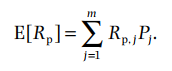

**Valor esperado de un portafolio como funcion de sus assets:**
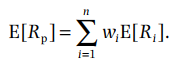
**Varianza de un portafolio**
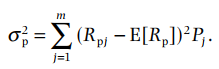
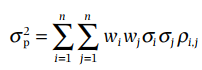

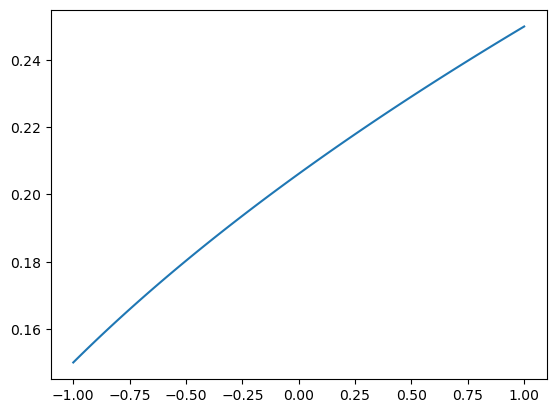

In [102]:
std_dev_asset1 = 0.4
std_dev_asset2 = 0.1

w1 = 0.5
w = np.array([w1, 1-w1])

rho = 0.5

portfolio_std_dev = []
for rho in np.linspace(-1,1,100):
    cov_matrix = np.array(
    [[std_dev_asset1**2, rho*std_dev_asset1*std_dev_asset2],
     [rho*std_dev_asset1*std_dev_asset2, std_dev_asset2**2]])
    
    portfolio_std_dev.append(np.sqrt(w.T@cov_matrix@w))

plt.plot(np.linspace(-1,1,100), portfolio_std_dev)

¿Podríamos generar un portafolio con varianza igual a 0?